# transforming data

In [258]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#defining working directories
dir=os.getcwd().split('/')
datadir='/'.join(dir[0:-1])+'/data'
modeldir='/'.join(dir[0:-1])+'/models'
%matplotlib inline


# gettin data ready to be used

3 main:
    -split data to features and labels
    
    -Filling or dropping empty labels
    
    -Converting nonnumerical to numerical
    

In [2]:
df=pd.read_csv(datadir+'/heart-disease.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
features=df.drop('target',axis=1)
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
labels=df['target']
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

training_features,training_labels,test_features,test_labels=train_test_split(features,labels,test_size=0.2)

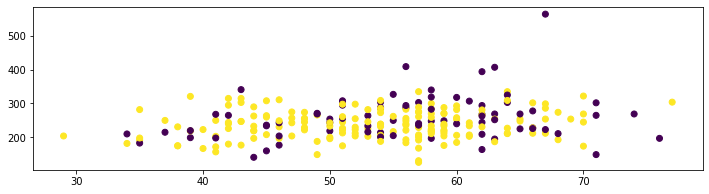

In [6]:
training_features=training_features.sort_values(by=['age'])
figure=plt.figure(figsize=(12,3))
plt.scatter(training_features['age'],training_features['chol'],c=training_features['sex'])


In [7]:
car_sales=pd.read_csv(datadir+'/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [8]:
x=car_sales.drop('Price', axis=1)
y=car_sales['Price']



In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features=['Make', 'Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  cat_features)],
                                remainder="passthrough")
    
trans_x=transformer.fit_transform(x)
pd.DataFrame(trans_x)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [10]:
 dummies= pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies


,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [11]:
np.random.seed(42)
x_tr,x_tst,y_tr,y_tst=train_test_split(trans_x,y,test_size=0.2)

In [12]:
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.simplefilter("ignore")
model =RandomForestRegressor()
model.fit(x_tr, y_tr)
model.score(x_tst,y_tst)

0.30431565439836705

## missing data

Filling 
Removing

In [13]:
df=pd.read_csv(datadir+'/car-sales-extended-missing-data.csv')
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [14]:

#fill with pandas
df["Make"].fillna("missing",inplace=True)
df["Colour"].fillna("missing",inplace=True)
df["Odometer (KM)"].fillna(df["Odometer (KM)"].mean(),inplace=True)
df["Doors"].fillna(4,inplace=True)
df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [15]:
# convert to numbers
x=df.drop("Price", axis=1)
y=df["Price"]

cat_features=['Make', 'Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  cat_features)],
                                remainder="passthrough")
trans_x=transformer.fit_transform(x)
x_tr,x_tst,y_tr,y_tst=train_test_split(trans_x,y)

In [16]:

model =RandomForestRegressor()
model.fit(x_tr, y_tr)
model.score(x_tst,y_tst)

0.12179874132830715

## Fill missing vaues withs skit learn

In [17]:
dfs=pd.read_csv(datadir+'/car-sales-extended-missing-data.csv')
dfs.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [18]:
dfs.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [19]:
dfs.dropna(subset=["Price"],inplace=True)
dfs.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [20]:
x=dfs.drop("Price", axis=1)
y=dfs["Price"]


In [21]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer=SimpleImputer(strategy='constant',fill_value='missing')
door_imputer=SimpleImputer(strategy='constant',fill_value=4)
num_imputer=SimpleImputer(strategy='mean')

cat=["Make","Colour"]
doors=["Doors"]
num=["Odometer (KM)"]
imputer= ColumnTransformer([("cat_imputer", cat_imputer,cat),
                            ("door_imputer",door_imputer,doors ),
                            ("num_imputer",num_imputer,num)])
filled_x=imputer.fit_transform(x)
filled_x



array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [22]:
df_filled=pd.DataFrame(filled_x,columns=["Make","Colour","Odometer (KM)","Doors"])
df_filled.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [23]:
df_filled.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [24]:
x=df_filled
cat_features=['Make', 'Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  cat_features)],
                                remainder="passthrough")
trans_x=transformer.fit_transform(x)


In [25]:
np.random.seed(42)
x_tr,x_tst,y_tr,y_tst=train_test_split(trans_x,y,test_size=0.2)
rf=RandomForestRegressor(n_estimators=20)
rf.fit(x_tr,y_tr)
rf.score(x_tst,y_tst)


-0.04828242518832626

In [26]:
len(df_filled)

950

## Choosing model


### pickin model for regression problem


In [27]:
from sklearn.datasets import load_boston

In [28]:
b=load_boston()
boston=pd.DataFrame(b["data"],columns=[b["feature_names"]])

target=pd.Series(b["target"].astype(float),index=[i for i in range(len(b["target"]))])
target
boston["target"]=target
b


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

### regresion - > RidgeRegression

In [29]:
from sklearn.linear_model import Ridge

np.random.seed(42)
x=boston.drop("target",axis=1)

y=target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


reg_model=Ridge(alpha=1.0)
reg_model.fit(x_train,y_train)
reg_model.score(x_test,y_test)

0.6662221670168522

In [30]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
x=boston.drop("target",axis=1)

y=target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

ens_model=RandomForestRegressor(n_estimators=100)
ens_model.fit(x_train,y_train)
ens_model.score(x_test,y_test)

0.873969014117403

In [31]:
hd=pd.read_csv(datadir+'/heart-disease.csv')
hd.head()
len(hd)

303

In [32]:
from sklearn.svm import LinearSVC

np.random.seed(42)
x=hd.drop("target", axis=1)
y=hd["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
lsvc=LinearSVC(max_iter=10000)
lsvc.fit(x_train,y_train)
lsvc.score(x_test,y_test)

0.8688524590163934

In [33]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=hd.drop("target", axis=1)
y=hd["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestClassifier(50)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8852459016393442

# Fit the model for predictions 

In [35]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=hd.drop("target", axis=1)
y=hd["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
 
model=RandomForestClassifier(50)

model.fit(x_train,y_train)

model.score(x_test,y_test)

0.8852459016393442

In [36]:
# Predictions
#use a trained modle to make predictions

y_preds=model.predict(x_test)

In [37]:
y_test


179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

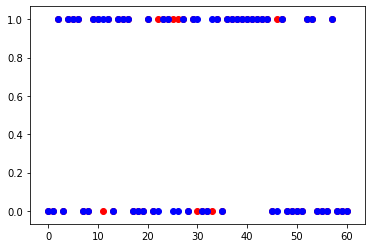

In [38]:
plt.scatter(x=[i for i in range(len(y_test))],y=y_preds, color='r')
plt.scatter(x=[i for i in range(len(y_test))],y=y_test, color='b')

In [39]:
np.mean(y_test==y_preds)

0.8852459016393442

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8852459016393442

In [41]:
model.predict_proba(x_test)[:5]

array([[0.9 , 0.1 ],
       [0.5 , 0.5 ],
       [0.44, 0.56],
       [0.8 , 0.2 ],
       [0.16, 0.84]])

In [42]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [43]:
np.random.seed(42)
y=pd.Series(b["target"])
x=pd.DataFrame(b["data"],columns=b["feature_names"])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [44]:
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
y_preds=model.predict(x_test)


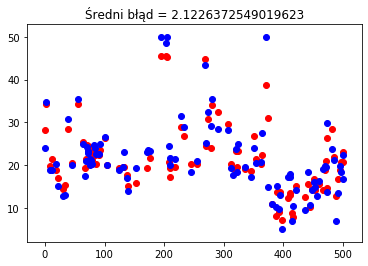

In [45]:
from sklearn.metrics import mean_absolute_error
plt.scatter(x=x_test.index,y=y_preds,color='r');
plt.scatter(x=x_test.index,y=y_test,color='b');
plt.title(f"Średni błąd = {mean_absolute_error(y_preds,y_test)}");

In [46]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(100)
x=hd.drop("target",axis=1)
y=hd["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y)
clf= RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)


0.8552631578947368

In [47]:
# score estimator
clf.score(x_test,y_test)

0.8552631578947368

In [48]:
np.random.seed(42)
y=pd.Series(b["target"])
x=pd.DataFrame(b["data"],columns=b["feature_names"])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
y_preds=model.predict(x_test)
model.score(x_test,y_test) #dafault coefficient of determination R^2

0.873969014117403

## Evaluate

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(100)
x=hd.drop("target",axis=1)
y=hd["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y)
clf= RandomForestClassifier()
clf.fit(x_train,y_train)
print(clf.score(x_test,y_test))
y_preds=clf.predict_proba(x_test)
cross_val_score(clf,x,y, cv= 5)


0.8552631578947368


array([0.83606557, 0.8852459 , 0.83606557, 0.8       , 0.75      ])

In [50]:
from sklearn.model_selection import cross_val_score
print( f"{np.mean(cross_val_score(clf,x,y))*100:.2f}%")

78.22%


**Area under the curve ROC curve**

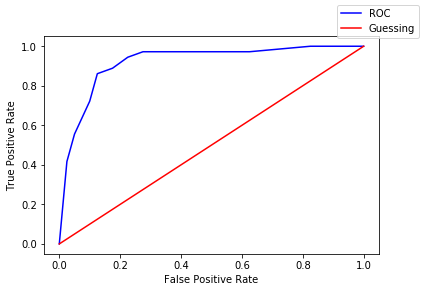

In [51]:
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix
y_probs_pos=y_preds[:,1]
y_probs_neg=y_preds[:,0]
fpr,tpr,threshold=roc_curve(y_test,y_probs_pos)
ax=plt.figure()
plt.plot(fpr,tpr,color='b',label=["ROC"])
plt.plot([0,1],[0,1],color='r',label=["Guessing"])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax.legend(["ROC","Guessing"])
plt.show()

In [52]:
threshold
roc_auc_score(y_test,y_probs_pos)

0.9190972222222222

In [53]:
y_probs=clf.predict(x_test)
confusion_matrix(y_test,y_probs)

array([[33,  7],
       [ 4, 32]])

In [54]:
pd.crosstab(y_test,y_probs,rownames=["Actual label"],colnames=["Predicted labels"])

Predicted labels,0,1
Actual label,,
0,33,7
1,4,32


In [55]:
import seaborn  as  sns

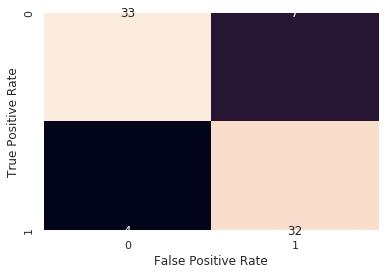

In [56]:
sns.set(font_scale=1)
Mconf=confusion_matrix(y_test,y_probs)
ax=plt.figure();
sns.heatmap(Mconf, 
            annot=True,
           cbar=False);
plt.xlabel("False Positive Rate");
plt.ylabel("True Positive Rate");



**Classification report**


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_probs))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86        40
           1       0.82      0.89      0.85        36

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.86        76
weighted avg       0.86      0.86      0.86        76



## Regression model

In [58]:
#Regresion model evaluation metrics
from sklearn.ensemble import RandomForestRegressor
np.random.seed(100)
x=boston
y=pd.Series(b["target"])
x_train,x_test,y_train,y_test=train_test_split(x,y)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.9991120396178709

In [59]:
from sklearn.metrics import r2_score
y_test_mean=np.full(len(y_test),y_test.mean())
r2_score(y_test,y_test_mean)


0.0

In [62]:
r2_score(y_test,y_test)

1.0

In [64]:
y_preds=model.predict(x_test)
r2_score(y_test,y_preds)

0.9991120396178709

**Mean absolute error**

In [66]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
y=b["target"]
x=boston
x_train,x_test,y_train,y_test=train_test_split(x,y)
model.fit(x_train,y_train)
y_preds=model.predict(x_test)
model.score(x_test,y_test)

0.9988918510659952

In [67]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds,y_test)

0.13740157480314963

In [73]:
df=pd.DataFrame({'actual':y_test,"prediction":y_preds,'error':np.abs(y_test-y_preds)})

In [74]:
df['error'].mean()

0.13740157480314957

**Mean squared error**

In [75]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_preds,y_test)

0.09106692913385853

In [76]:
df['mse']=(y_test-y_preds)**2
df['mse'].mean()

0.09106692913385851

In [78]:
df.describe()

,actual,prediction,error,mse
count,127.000000,127.000000,127.000000,127.000000
mean,23.268504,23.272992,0.137402,0.091067
std,9.101183,9.165603,0.269742,0.460217
min,7.000000,6.240000,0.000000,0.000000
25%,17.900000,17.855000,0.030000,0.000900
50%,21.900000,21.850000,0.070000,0.004900
75%,25.000000,25.095000,0.120000,0.014400
max,50.000000,50.000000,2.000000,4.000000


## Scoring parameter

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(100)
x=hd.drop("target",axis=1)
y=hd["target"]

x_train, x_test, y_train, y_test=train_test_split(x,y)
model=RandomForestClassifier()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8552631578947368

In [100]:
from sklearn.metrics import confusion_matrix
y_preds=model.predict(x_test)
ConfM=confusion_matrix(y_preds,y_test)
ConfM

array([[33,  4],
       [ 7, 32]])

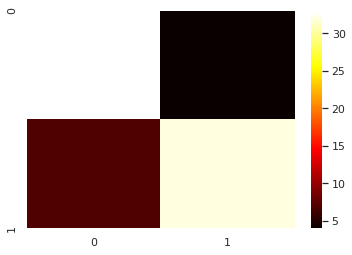

In [98]:
sns.heatmap(ConfM,cmap='hot')

In [103]:
cv_acc=cross_val_score(model,x,y,cv=5)

In [109]:
print(f"cross-validated accuracy:={np.mean(cv_acc)*100:.2f}%")

cross-validated accuracy:=80.51%


In [110]:
cv_acc=cross_val_score(model,x,y,cv=5,scoring='accuracy')

In [111]:
print(f"{np.mean(cv_acc)*100:.2f}%")

80.52%


In [114]:
cv_precision=cross_val_score(model,x,y,scoring='precision')
print(f"cross-validated accuracy:={np.mean(cv_precision)*100:.2f}%")


cross-validated accuracy:=84.78%


In [115]:
cv_recall=cross_val_score(model,x,y,scoring='recall')
print(f"cross-validated accuracy:={np.mean(cv_recall)*100:.2f}%")


cross-validated accuracy:=80.61%


In [116]:
cv_f1=cross_val_score(model,x,y,scoring='f1')
print(f"cross-validated accuracy:={np.mean(cv_f1)*100:.2f}%")


cross-validated accuracy:=81.60%


Regression model

In [131]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
np.random.seed(42)
x=boston
y=b["target"]
clf=RandomForestRegressor()
cross_acc=cross_val_score(clf,x,y,cv=5)
print(f"accuracy of regression model on cross_val_scoe:{np.mean(cross_acc)*100:.2f}%")

accuracy of regression model on cross_val_scoe:99.84%


In [133]:
cross_mae=cross_val_score(clf,x,y,cv=5,scoring='neg_mean_absolute_error')
cross_mae

array([-0.07421569, -0.13485149, -0.33584158, -0.17534653, -0.14019802])

In [135]:
print(f"accuracy of regression model on cross_val_scoe mae:{np.mean(cross_mae)}")

accuracy of regression model on cross_val_scoe mae:-0.17209066200737744


In [139]:
cross_mse=cross_val_score(clf,x,y,cv=5,scoring='neg_mean_squared_error')

In [140]:
print(f"accuracy of regression model on cross_val_scoe mse:{np.mean(cross_mse)}")

accuracy of regression model on cross_val_scoe mse:-0.10882539701028923


In [144]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(12)

x=hd.drop("target",axis=1)
y=hd['target']
x_train,x_test,y_train,y_test=train_test_split(x,y)
clf = RandomForestClassifier()
clf.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [145]:
y_preds=clf.predict(x_test)
y_preds

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [148]:
print(f"Accuracy: {accuracy_score(y_test,y_preds)}")
print(f"Precision: {precision_score(y_preds,y_test)}")
print(f"Recall Score: {recall_score(y_preds,y_test)}")
print(f"F1 score: {f1_score(y_preds,y_test)}")

Accuracy: 0.8026315789473685
Precision: 0.7837837837837838
Recall Score: 0.8055555555555556
F1 score: 0.7945205479452055


**Regrssion evaluation function**

In [160]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
np.random.seed(42)
x=boston
y=b["target"]
clf=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y)
clf.fit(x_train,y_train)
y_preds=clf.predict(x_test)

In [161]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print(f"R2: {r2_score(y_preds,y_test)}")
print(f"MAE: {mean_absolute_error(y_preds,y_test)}")
print(f"MSE: {mean_squared_error(y_preds,y_test)}")

R2: 0.9992276047282118
MAE: 0.10826771653543353
MSE: 0.052819685039370255


## improving model

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(12)

x=hd.drop("target",axis=1)
y=hd['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [167]:
clf.score(x_test,y_test)

0.8032786885245902

**Tuning by hand**

* max_depth
* max_features
* max_leaf_nodes
* min_samples_split

In [182]:
# train validate test sets

def evaluate_preds(y_true,y_preds):
    acc=accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict= {'accuracy':acc,'precision': precision,'recall':recall,'f1':f1}
    return metric_dict

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(12)
hd=hd.sample(frac=1)
x=hd.drop('target',axis=1)
y=hd['target']
train_split=round(0.7*len(hd))
valid_split=round(train_split+0.15*len(hd))
x_train,y_train=x[:train_split][:],y[:train_split][:]
x_valid,y_valid=x[train_split:valid_split][:],y[train_split:valid_split][:]
x_test,y_test=x[valid_split:][:],y[valid_split:]
print(len(x_test),len(hd))
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
print(clf.get_params())
y_preds=clf.predict(x_valid)
evaluate_preds(y_valid,y_preds)

46 303
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


{'accuracy': 0.8888888888888888,
 'precision': 0.92,
 'recall': 0.8846153846153846,
 'f1': 0.9019607843137256}

In [209]:
clf_2=RandomForestClassifier()
clf_2.fit(x_train,y_train)
y_preds2=clf_2.predict(x_valid)
baseline_metrics=evaluate_preds(y_valid,y_preds2)

In [227]:
clf_3=RandomForestClassifier(n_estimators=100,max_depth=10)
clf_3.fit(x_train,y_train)
y_preds3=clf_3.predict(x_valid)
byhand_metrics=evaluate_preds(y_valid,y_preds3)

In [194]:
from sklearn.model_selection import RandomizedSearchCV
grid={'n_estimators':[10,100,200,1000,1200],
      'max_depth':[5,10,20,30],
      'max_features':['auto','sqrt'],
      'min_samples_split':[2,4,6],
      'min_samples_leaf':[1,2,4]
     }
np.random.seed(100)
hd=hd.sample(frac=1)
x=hd.drop('target',axis=1)
y=hd['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)
rs_clf=RandomizedSearchCV(estimator=clf,
                         param_distributions=grid,
                         n_iter=10,
                         cv=5,
                         verbose=2)

In [195]:
rs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=1200, min_samples_split=6, min_sam

[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.1s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   29.8s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=1, o

In [197]:
rs_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [198]:
rs_y_preds=rs_clf.predict(x_test)

In [200]:
rs_metrics=evaluate_preds(y_test,rs_y_preds)

In [201]:
rs_metrics

{'accuracy': 0.7540983606557377,
 'precision': 0.7297297297297297,
 'recall': 0.84375,
 'f1': 0.7826086956521738}

In [202]:
from sklearn.model_selection import GridSearchCV

grid2={'n_estimators':[100,200,1000,1200],
      'max_depth':[None,20,30],
      'max_features':['sqrt'],
      'min_samples_split':[2,6],
      'min_samples_leaf':[1,2]
     }
gs_clf=GridSearchCV(clf,
                   param_grid=grid2,
                   cv=5,
                   verbose=3)
gs_clf.fit(x_train,y_train)
gs_clf.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.796, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.857, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.878, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.875, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.745, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.816, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, score=0.809, total=   1.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.837, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.857, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.837, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, score=0.837, total=   1.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, score=0.837, total=   1.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, score=0.896, total=   1.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, score=0.787, total=   1.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimator

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, score=0.875, total=   1.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, score=0.809, total=   1.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, score=0.796, total=   1.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, score=0.837, total=   1.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, score

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, score=0.816, total=   1.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, score=0.837, total=   1.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, score=0.857, total=   1.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, score=0.896, total=   1.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, score

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, score=0.878, total=   0.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, score=0.875, total=   0.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, score=0.809, total=   0.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, score=0.816, total=   1.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, score=0.85

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, score=0.816, total=   0.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, score=0.878, total=   0.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, score=0.878, total=   0.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, score=0.875, total=   0.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, score=0.809, t

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  3.3min finished


{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [205]:
gs_y_preds=gs_clf.predict(x_test)
gs_metrics=evaluate_preds(y_test,gs_y_preds)

** Comparision**

In [211]:
compare_metrics=pd.DataFrame({'baseline':baselne_metrics,
                              'rs_metrics':rs_metrics,
                              'by_hand_metrics': byhand_metrics,
                              'gs_metrics':gs_metrics
                             })

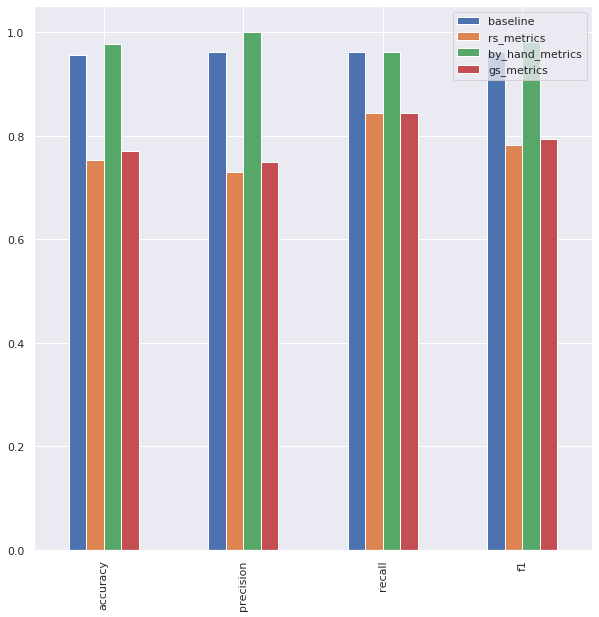

In [213]:
compare_metrics.plot.bar(figsize=(10,10))

## Saving and loading model

In [228]:
#Pickle
import pickle
pickle.dump(clf_3,open(modeldir+'/clf_random_forest_byhand.pkl','wb'))
loaded_model=pickle.load(open(modeldir+'/clf_random_forest_byhand.pkl','rb'))
loaded_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

   accuracy  precision    recall        f1
0  0.913043   0.923077  0.923077  0.923077


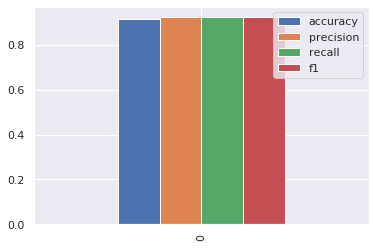

In [243]:

from sklearn.model_selection import train_test_split
np.random.seed(12)
hd=hd.sample(frac=1)
x=hd.drop('target',axis=1)
y=hd['target']

train_split=round(0.7*len(hd))
valid_split=round(train_split+0.15*len(hd))
x_train,y_train=x[:train_split][:],y[:train_split][:]
x_valid,y_valid=x[train_split:valid_split][:],y[train_split:valid_split][:]
x_test,y_test=x[valid_split:][:],y[valid_split:]


y_preds=loaded_model.predict(x_test)
loaded_model_stats=pd.DataFrame({k:[v] for k,v in evaluate_preds(y_test,y_preds).items()})
loaded_model_stats.plot.bar()
print(loaded_model_stats)

In [245]:
#Joblib module
!pip install joblib
from joblib import dump,load
dump(gs_clf,filename=modeldir+'/gs_clf.joblib')

['/home/smaket/PycharmProjects/Data_Science/models/gs_clf.joblib']

In [254]:
loaded_joblib=load(filename=modeldir+'/gs_clf.joblib')
loaded_joblib

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [256]:
np.random.seed(13)
y_preds_gs=loaded_joblib.predict(x_valid)
evaluate_preds(y_valid,y_preds_gs)

{'accuracy': 0.9777777777777777,
 'precision': 1.0,
 'recall': 0.9545454545454546,
 'f1': 0.9767441860465117}

In [259]:
##Pipeline

car_sales_data=pd.read_csv(datadir+'/car-sales-missing-data.csv')


In [261]:
car_sales_data.head()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


In [262]:
car_sales_data.dtypes

Make         object
Colour       object
Odometer    float64
Doors       float64
Price        object
dtype: object

In [265]:
car_sales_data.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [298]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
data=car_sales_data
data.dropna(subset=['Price'],inplace=True)

#define features and transformer pipelines

categorical_features=["Make","Colour"]
categorical_transformer= Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))])

door_feature=['Doors']
door_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value=4))])

numeric_features=['Odometer']
numeric_transformer=Pipeline(steps=[('imputer',SimpleImputer())])

# setup processing steps
preprocessor=ColumnTransformer(transformers=[
    ('cat',categorical_transformer,categorical_features),
    ('door',door_transformer,door_feature),
    ('numeric',numeric_transformer,numeric_features)
    ])

#creating pipeline

model=Pipeline(steps=[('preprocessor',preprocessor),('model',RandomForestRegressor())])
x= data.drop('Price',axis=1)
y=data['Price'].apply(lambda x:float(x.replace('$','').replace(',','.'))*1000)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(y)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0     4000.0
1     5000.0
2     7000.0
3    22000.0
4     3500.0
5     4500.0
6     7500.0
9     9700.0
Name: Price, dtype: float64


-0.4247345507669833

In [299]:
grid={
    'preprocessor__numeric__imputer__strategy':['mean','median'],
    'model__max_depth':[None,5],
    'model__n_estimators':[100,1000],
    'model__max_features':['auto'],
    'model__min_samples_split':[2,4]
    
}
gs_model=GridSearchCV(model,grid,cv=5,verbose=2)
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median 
[CV]  model__max_depth=None, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean, total=   1.0s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean, total=   1.0s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean 
[CV]  model__max_depth=N

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median, total=   1.0s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median, total=   1.0s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median, total=   1.0s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median 
[CV]  model__max_depth=5, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   45.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                    

In [300]:
gs_model.score(x_test,y_test)

-0.36720513075237404